In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df

,A,B
0,1,10
1,2,20
2,3,30


In [ ]:
# apply, içerisine yazdığımız fonksiyonu dataframe datası içinde uyguluyor

# Transform apply ın özel bi durumudur. Transform her bir veriyi tek tek işleyerek df ile aynı yapıda sonuc df si döndürür. 

# Apply aggregation olarak sonuc döndürmekte de yeteneklidir.

# apply çoklu serilerle çalışabilirken transform yalnız bir seri ile çalışabiliyor.

# Appyly'ın aksine transform string içinde ifade edilen işlemleri yapabilir. 

In [3]:
def topla_10(x):
    return x + 10

In [4]:
df.apply(topla_10)

# topla_10 fonksiyonunu df içinde uyguladı ve tüm elemanları 10 ile topladı

,A,B
0,11,20
1,12,30
2,13,40


In [5]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [6]:
#  Transform string içinde ifade edilen işlemleri yapabilir. 

df.transform("sqrt")

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [7]:
df.apply("sqrt")

# apply ile bu çalışmaz

AttributeError: 'DataFrame' object has no attribute 'sqrt'

In [8]:
df.transform([np.sqrt, np.exp])

# liste şeklinde belirttiğimiz fonksiyon / işlemlerde çalışıyor

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [9]:
df.apply([np.sqrt, np.exp])

# liste şeklinde belirttiğimiz fonksiyon / işlemlerde çalışıyor

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [ ]:
# A sütununa sqrt, B sütununa sum fonksiyonunu uygulamak isteyelim.

In [10]:
df.transform({"A": np.sqrt, "B":np.exp})

# transform ile farklı columnlara farklı işlemleri yapabiliyoruz

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [17]:
df.apply({"A": np.sqrt, "B":np.exp})

# apply ile de farklı columnlara farklı işlemleri yapabiliyoruz 

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [11]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [13]:
# A sütununa denk gelen değeri B sütunundaki değerden çıkartan fonksiyon yapalım.

def çıkarma(x):
    return x["B"] - x["A"]

In [15]:
# çıkarma fonksiyonunu df dataframe e sütun bazlı uygula.

df.apply(çıkarma, axis=1)

# apply ile iki farklı seri ile çalışabiliyorum

0     9
1    18
2    27
dtype: int64

In [16]:
df.transform(çıkarma, axis=1)

# transform yalnız tek bir seri ile çalışabildiğinden hata aldık.

ValueError: Function did not transform

# missing values

### dropna, fillna

In [21]:
df1 = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

df1

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [ ]:
# how=any --> satırda/kolonda herhangi bir değer NaN ise satırı/sütunu siler
# how=all --> satırda/kolonda tüm değerler NaN ise satırı/sütunu siler (daha güvenli)
# thresh=n --> satırda/kolonda en az "n" tane NaN olmayan value varsa o satırı/sütunu korur, yoksa siler.

In [46]:
df1.dropna(how='any')

,A,B,C
0,1.0,5.0,1


In [47]:
df1.dropna(how='all')

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [39]:
df1.dropna(thresh = 2) # satırda drop işlemi uyguladık

# 2 ve daha fazla sayıda NaN olmayan değer olan satırları tutup 2'den az sayıda olan satırı sildi.

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [23]:
df1.dropna(thresh = 2, axis = 1) # sütunda drop işlemi uyguladık

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [25]:
# A sütununun NaN olan değerini yine A sütununun ortalaması ile dolduralım

df1["A"].fillna(value = df1["A"].mean())

# df1'in A sütununa şunu uygula --> NaN olan değerleri df1["A"].mean (ortalama) değeri  ile doldur.

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [26]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])

In [29]:
df2 = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}
)

In [30]:
df2

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [31]:
df2["Var1"].fillna(0)

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [32]:
df2["Var2"].mean()

# missing value ları doldurmak için Var2'nin ortalamasını alalım

6.166666666666667

In [33]:
df2["Var2"].fillna(df2["Var2"].mean())

# Var2 sütunundaki missing value ları Var2 nin orlaması ile doldurduk.

0     8.000000
1     6.166667
2     5.000000
3     8.000000
4    11.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: Var2, dtype: float64

In [34]:
df2.apply(lambda x : x.fillna(x.mean()), axis = 0)

# biraz önce tek tek yaptığımızı dataframe geneline lambda fonksiyonu kullanarak uyguladık.

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [35]:
df2["Var3"].fillna(df2["Var3"].mean())

0    11.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6    11.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [43]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df3 = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)

df3

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [42]:
df3.groupby("department")["salary"].mean()

# departmanalara göre ortalama maaşı getirdik

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [44]:
df3.salary.mean()

6.0

In [ ]:
# missing value da tüm salary'nin ortalamasını doldurursak hata yapmış oluruz. 
# çünkü IT cilerin maaşları ile HR cilerin maaşları farklı.
# Bunların ortalamalarını ayrı ayrı uygulayacağız

In [52]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean"))
                     
# department lere göre gruplandırdık ve bu grubların "salary" sütununa transformda belirtilen fonksiyonu uyguladık.
# yani transform fonksiyonunu kullanarak salary sütununa gruplu şekilde mean' değerini NaN olan değerlerin yerine uyguladık.
                     
# mean'i string olarak belirttiğimiz için burda apply yerine transform kullandık.

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [48]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df4 = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df4

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [49]:
df4["department"].fillna(method = "ffill")

# NaN olan değeri bir öncesi ile dolduruyor

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [50]:
df4["department"].fillna(method = "bfill")

# NaN olan değeri bir sonrası ile dolduruyor

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [56]:
import seaborn as sns

df5 = sns.load_dataset("diamonds")
df5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
df5.describe()

# dataframe'in istatistiksel değerlerini görelim.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='carat'>

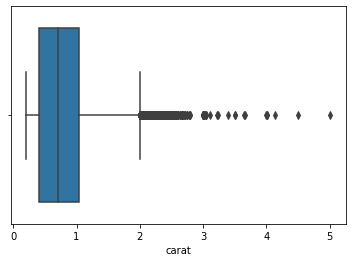

In [88]:
sns.boxplot(x = df5.carat)

# df5'in "carat" sütununun değerlerini plotluyoruz.

<AxesSubplot:xlabel='table'>

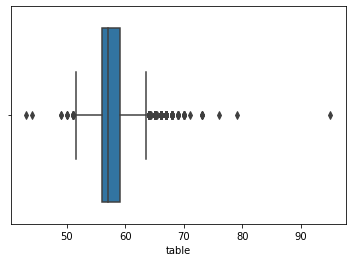

In [89]:
sns.boxplot(x = df5.table)

# df5'in "table" sütununun değerlerini plotluyoruz.

In [62]:
df5["table"].quantile(0.25)

56.0

In [65]:
Q1 = df5["table"].quantile(0.25)
Q3 = df5["table"].quantile(0.75)

In [66]:
IQR  = Q3 - Q1

IQR

3.0

In [67]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# bunlardan küçük ve büyük olan değereler OUTLIER dır!!

In [82]:
lower_lim

51.5

In [83]:
upper_lim

63.5

In [70]:
outlier_low = df5[df5["table"] < lower_lim]

outlier_low
# table sütunu değerlerimin lower_lim'den küçük olanları (outlier değerleri) filtrele

,carat,cut,color,clarity,depth,table,price,x,y,z
1515,0.91,Fair,F,SI2,65.3,51.0,2996,6.05,5.98,3.93
3238,0.94,Fair,H,SI2,66.0,50.1,3353,6.13,6.17,4.06
3979,1.00,Premium,H,SI1,62.2,51.0,3511,6.47,6.40,4.00
4150,0.91,Premium,F,SI2,61.0,51.0,3546,6.24,6.21,3.80
5979,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
7418,1.02,Fair,F,SI1,61.8,50.0,4227,6.59,6.51,4.05
8853,1.00,Fair,E,VS2,66.4,51.0,4480,6.31,6.22,4.16
11368,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
22701,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
25179,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97


In [71]:
outlier_high = df5[df5["table"] > upper_lim]

outlier_high

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34


In [72]:
df5[(df5["table"] < lower_lim) | (df5["table"] > upper_lim)]

# table sütununun üst ve alt outlier değerlerini filtreleyip getirdim.

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34


In [73]:
df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]

# üst satırdaki (outlier ları veren) ifadenin başına ~ (tilda) koyarsam 
# bu değerlerin dışında kalan yani outlier olmayan değerlerimi filtreleyip getirir

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [77]:
df5_cleaned = df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]

# outlierlardan arındırılmış olan değerleri 


<AxesSubplot:xlabel='table'>

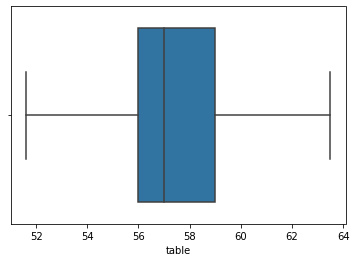

In [78]:
sns.boxplot(x = df5_cleaned.table)

# outlierlardan arındırılmış (daha temiz dataya sahip) tablomuzun grafiğinin daha düzgün olduğunu gördük.

<AxesSubplot:xlabel='carat'>

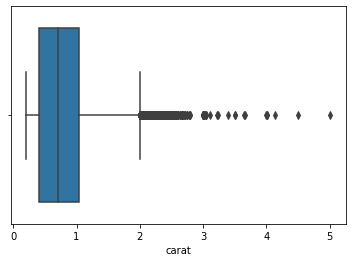

In [75]:
sns.boxplot(x = df5["carat"])

# carat sütununun grafiğine bakarsak sağa kuyruklu (right skewed) yapı olduğunu görüyoruz

<AxesSubplot:xlabel='carat'>

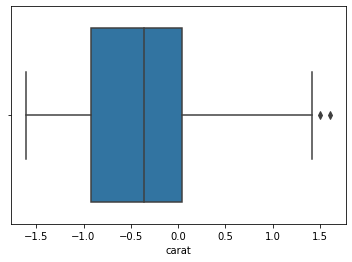

In [76]:
# bu sütunun logaritmasını alarak belki bir nebze outlierlardan kurtarabiliriz.

sns.boxplot(x=np.log(df5["carat"]))

# şimdi biraz daha düzeldi. logartima alma sağa veya sola kuyruklu yapılarda etkilidir.

### winsorize

In [79]:
from scipy.stats.mstats import winsorize

 # winsorize'ı scipy kütüphanesinden import ettik.

In [80]:
df_table_win = winsorize(df5["table"], (0.01, 0.02))

# lower_lim veya upper_lim değerleri arasında değil de belirtilen değerler arasındaki value ları al. 

<AxesSubplot:>

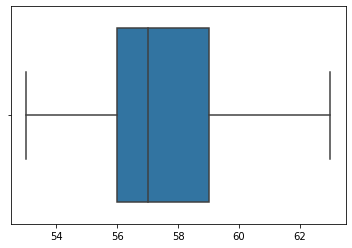

In [81]:
sns.boxplot(x = df_table_win)